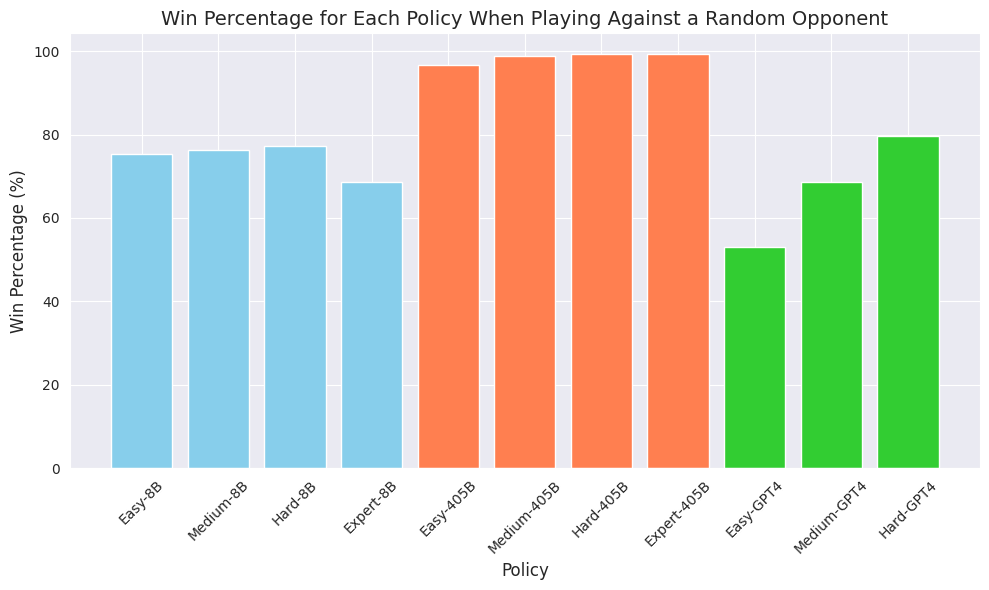

In [1]:
from distutils.command.install import value

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV data
data = pd.read_csv('TELO-C4-Policy_Comparison.csv')


def update_name(x: str):
    new_name = x
    if "Gecco-" in x:
        new_name = x.replace("Gecco-", "")
        new_name += "-GPT4"

    return new_name


data['Policy2_Name'] = data['Policy2_Name'].apply(lambda x: update_name(x))
data['Policy1_Name'] = data['Policy1_Name'].apply(lambda x: update_name(x))

# Filter for games where one of the policies is 'Random'
random_games = data[(data['Policy1_Name'] == 'Random') | (data['Policy2_Name'] == 'Random')]

# Calculate the win percentages for the opponents of Random
results = []
for _, row in random_games.iterrows():
    if row['Policy1_Name'] == 'Random':
        total_games = row['Policy1_Wins'] + row['Policy2_Wins'] + row['Ties']
        opponent_win_percentage = (row['Policy2_Wins'] / total_games) * 100
        opponent = row['Policy2_Name']
    else:
        total_games = row['Policy1_Wins'] + row['Policy2_Wins'] + row['Ties']
        opponent_win_percentage = (row['Policy1_Wins'] / total_games) * 100
        opponent = row['Policy1_Name']

    results.append({'Opponent': opponent, 'Opponent_Win_Percentage': opponent_win_percentage})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)


def color_func(x):
    color = ""
    if '8B' in x:
        color = 'skyblue'
    elif '405B' in x:
        color = 'coral'
    else:
        color = 'limegreen'

    return color


# Assign colors based on policy type (8B or 405B)
colors = results_df['Opponent'].apply(lambda x: color_func(x))

# Create a bar plot for the win percentages
plt.figure(figsize=(10, 6))
plt.bar(results_df['Opponent'], results_df['Opponent_Win_Percentage'], color=colors)

# Add labels and title
plt.xlabel('Policy', fontsize=12)
plt.ylabel('Win Percentage (%)', fontsize=12)
plt.title('Win Percentage for Each Policy When Playing Against a Random Opponent', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [12]:
results_df[['difficulty', 'model']] = results_df['Opponent'].str.split('-', expand=True)
colors = ["color3", "yellow", "color1", "color4"]
for diff_idx, diff in enumerate(["Easy", "Medium", "Hard", "Expert"]):
    str_val = f"\\addplot[{colors[diff_idx]},line width=0.75pt,fill={colors[diff_idx]}!10] coordinates {{"
    for model in results_df['model'].unique():
        model_str = model if not model.endswith("B") else "LLama-" + model
        tmp_lst = results_df[(results_df["difficulty"] == diff) & (results_df["model"] == model)][
            "Opponent_Win_Percentage"].tolist()
        lst_val = str(tmp_lst[0]) if len(tmp_lst) > 0 else "0"
        str_val += f"({model_str},{lst_val}) "
    str_val += "};"
    print(str_val)

\addplot[color3,line width=0.75pt,fill=color3!10] coordinates {(LLama-8B,75.3) (LLama-405B,96.6) (GPT4,53.0) };
\addplot[yellow,line width=0.75pt,fill=yellow!10] coordinates {(LLama-8B,76.2) (LLama-405B,98.9) (GPT4,68.5) };
\addplot[color1,line width=0.75pt,fill=color1!10] coordinates {(LLama-8B,77.2) (LLama-405B,99.3) (GPT4,79.60000000000001) };
\addplot[color4,line width=0.75pt,fill=color4!10] coordinates {(LLama-8B,68.7) (LLama-405B,99.3) (GPT4,0) };


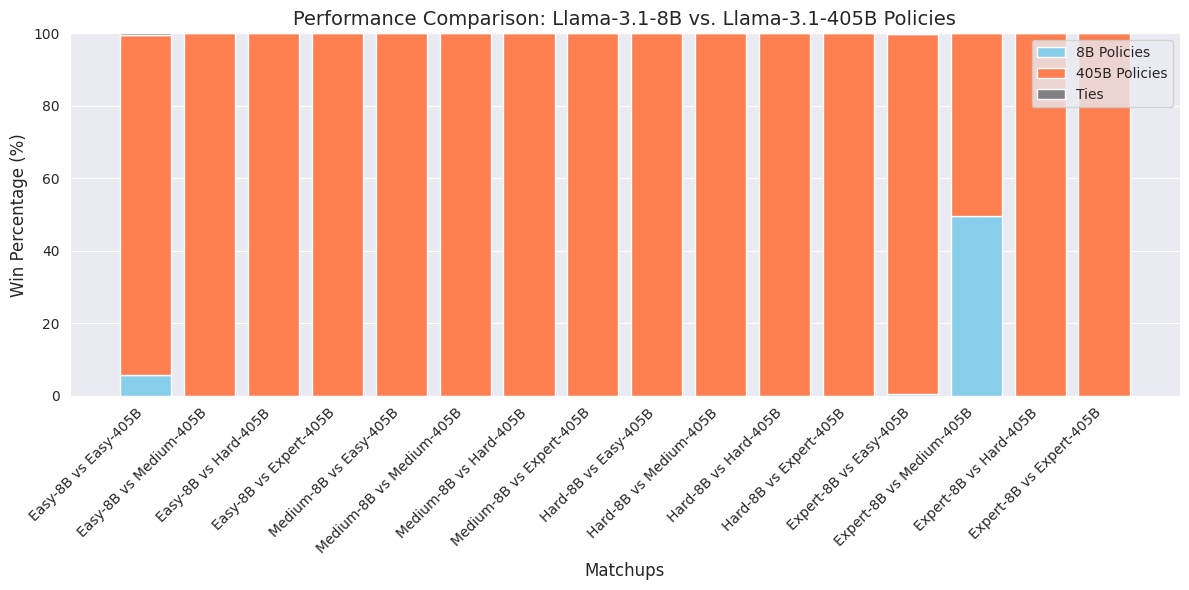

In [43]:

# Filter for games between 8B and 405B policies
comparison_games = data[
    ((data['Policy1_Name'].str.contains('8B')) & (data['Policy2_Name'].str.contains('405B'))) |
    ((data['Policy1_Name'].str.contains('405B')) & (data['Policy2_Name'].str.contains('8B')))
    ]

# Calculate win percentages for 8B and 405B policies
results = []
for _, row in comparison_games.iterrows():
    total_games = row['Policy1_Wins'] + row['Policy2_Wins'] + row['Ties']
    if total_games > 0:
        if '8B' in row['Policy1_Name']:
            win_percentage_8b = (row['Policy1_Wins'] / total_games) * 100
            win_percentage_405b = (row['Policy2_Wins'] / total_games) * 100
        else:
            win_percentage_8b = (row['Policy2_Wins'] / total_games) * 100
            win_percentage_405b = (row['Policy1_Wins'] / total_games) * 100

        results.append({
            '8B_Policy': row['Policy1_Name'] if '8B' in row['Policy1_Name'] else row['Policy2_Name'],
            '405B_Policy': row['Policy2_Name'] if '405B' in row['Policy2_Name'] else row['Policy1_Name'],
            '8B_Win_Percentage': win_percentage_8b,
            '405B_Win_Percentage': win_percentage_405b,
            'Ties_Percentage': 100 - (win_percentage_8b + win_percentage_405b)
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Prepare data for the stacked bar chart
x = np.arange(len(results_df))  # the label locations

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(x, results_df['8B_Win_Percentage'], label='8B Policies', color='skyblue')
plt.bar(x, results_df['405B_Win_Percentage'], bottom=results_df['8B_Win_Percentage'], label='405B Policies',
        color='coral')
plt.bar(x, results_df['Ties_Percentage'], bottom=results_df['405B_Win_Percentage'] + results_df['8B_Win_Percentage'],
        label='Ties', color='gray')

# Add labels, title, and legend
plt.xlabel('Matchups', fontsize=12)
plt.ylabel('Win Percentage (%)', fontsize=12)
plt.title('Performance Comparison: Llama-3.1-8B vs. Llama-3.1-405B Policies', fontsize=14)

# Correctly align xticks with bars
plt.xticks(x, [f"{row['8B_Policy']} vs {row['405B_Policy']}" for _, row in results_df.iterrows()], rotation=45,
           ha='right', fontsize=10)

plt.yticks(fontsize=10)
plt.legend(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [44]:
# lama 8 gpt 4
difficulties = ["Easy", "Medium", "Hard", "Expert"]
print("x\ty\tvalue")
for lamapro in range(4):
    for lama in range(3):
        tmp = results_df[(results_df['405B_Policy'] == f"{difficulties[lamapro]}-405B") & (
                    results_df['8B_Policy'] == f"{difficulties[lama]}-8B")]
        pos = tmp["405B_Win_Percentage"].tolist()[0] / 100
        neg = tmp["8B_Win_Percentage"].tolist()[0] / 100
        value = pos - neg
        print(f"{lamapro}\t{lama}\t{value}")

x	y	value
0	0	0.879
0	1	1.0
0	2	1.0
1	0	1.0
1	1	1.0
1	2	1.0
2	0	1.0
2	1	1.0
2	2	1.0
3	0	1.0
3	1	1.0
3	2	1.0


In [15]:
results_df

,8B_Policy,405B_Policy,8B_Win_Percentage,405B_Win_Percentage,Ties_Percentage
0,Easy-8B,Easy-405B,5.8,93.7,0.5
1,Easy-8B,Medium-405B,0.0,100.0,0.0
2,Easy-8B,Hard-405B,0.0,100.0,0.0
3,Easy-8B,Expert-405B,0.0,100.0,0.0
4,Medium-8B,Easy-405B,0.0,100.0,0.0
5,Medium-8B,Medium-405B,0.0,100.0,0.0
6,Medium-8B,Hard-405B,0.0,100.0,0.0
7,Medium-8B,Expert-405B,0.0,100.0,0.0
8,Hard-8B,Easy-405B,0.0,100.0,0.0
9,Hard-8B,Medium-405B,0.0,100.0,0.0


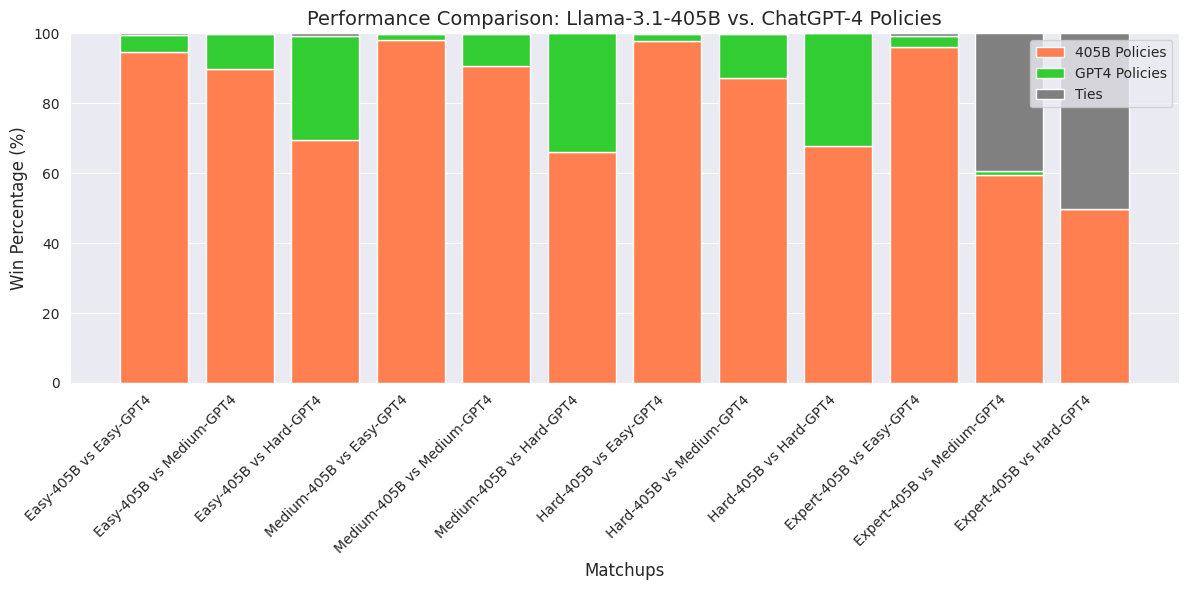

In [45]:

# Filter for games between 8B and 405B policies
comparison_games = data[
    ((data['Policy1_Name'].str.contains('GPT4')) & (data['Policy2_Name'].str.contains('405B'))) |
    ((data['Policy1_Name'].str.contains('405B')) & (data['Policy2_Name'].str.contains('GPT4')))
    ]

# Calculate win percentages for 8B and 405B policies
results = []
for _, row in comparison_games.iterrows():
    total_games = row['Policy1_Wins'] + row['Policy2_Wins'] + row['Ties']
    if total_games > 0:
        if 'GPT4' in row['Policy1_Name']:
            win_percentage_gpt4 = (row['Policy1_Wins'] / total_games) * 100
            win_percentage_405b = (row['Policy2_Wins'] / total_games) * 100
        else:
            win_percentage_gpt4 = (row['Policy2_Wins'] / total_games) * 100
            win_percentage_405b = (row['Policy1_Wins'] / total_games) * 100

        results.append({
            'GPT4_Policy': row['Policy1_Name'] if 'GPT4' in row['Policy1_Name'] else row['Policy2_Name'],
            '405B_Policy': row['Policy2_Name'] if '405B' in row['Policy2_Name'] else row['Policy1_Name'],
            'GPT4_Win_Percentage': win_percentage_gpt4,
            '405B_Win_Percentage': win_percentage_405b,
            'Ties_Percentage': 100 - (win_percentage_gpt4 + win_percentage_405b)
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Prepare data for the stacked bar chart
x = np.arange(len(results_df))  # the label locations

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(x, results_df['405B_Win_Percentage'], label='405B Policies', color='coral')
plt.bar(x, results_df['GPT4_Win_Percentage'], bottom=results_df['405B_Win_Percentage'], label='GPT4 Policies',
        color='limegreen')
plt.bar(x, results_df['Ties_Percentage'], bottom=results_df['405B_Win_Percentage'] + results_df['GPT4_Win_Percentage'],
        label='Ties', color='gray')

# Add labels, title, and legend
plt.xlabel('Matchups', fontsize=12)
plt.ylabel('Win Percentage (%)', fontsize=12)
plt.title('Performance Comparison: Llama-3.1-405B vs. ChatGPT-4 Policies', fontsize=14)

# Correctly align xticks with bars
plt.xticks(x, [f"{row['405B_Policy']} vs {row['GPT4_Policy']}" for _, row in results_df.iterrows()], rotation=45,
           ha='right', fontsize=10)

plt.yticks(fontsize=10)
plt.legend(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()



In [46]:
# lama 8 gpt 4
difficulties = ["Easy", "Medium", "Hard", "Expert"]
print("x\ty\tvalue")
for lamapro in range(4):
    for gpt in range(3):
        tmp = results_df[(results_df['405B_Policy'] == f"{difficulties[lamapro]}-405B") & (
                    results_df['GPT4_Policy'] == f"{difficulties[gpt]}-GPT4")]
        pos = tmp["405B_Win_Percentage"].tolist()[0] / 100
        neg = tmp["GPT4_Win_Percentage"].tolist()[0] / 100
        value = pos - neg
        print(f"{lamapro}\t{gpt}\t{value}")

x	y	value
0	0	0.8959999999999999
0	1	0.798
0	2	0.39899999999999997
1	0	0.964
1	1	0.8130000000000002
1	2	0.32
2	0	0.9589999999999999
2	1	0.743
2	2	0.35600000000000015
3	0	0.9299999999999999
3	1	0.583
3	2	0.49700000000000005


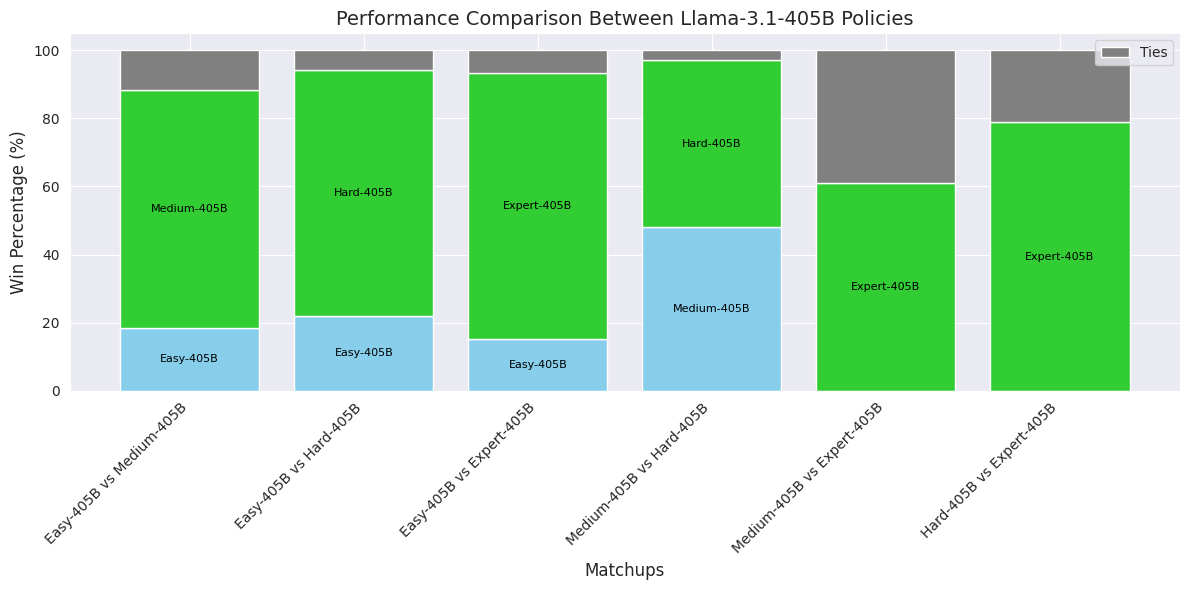

In [32]:
# Filter for games where both policies are from 405B
comparison_games = data[
    (data['Policy1_Name'].str.contains('405B')) & (data['Policy2_Name'].str.contains('405B'))
    ]

# Calculate win percentages for Policy1, Policy2, and ties
results = []
for _, row in comparison_games.iterrows():
    total_games = row['Policy1_Wins'] + row['Policy2_Wins'] + row['Ties']
    if total_games > 0:
        policy1_win_percentage = (row['Policy1_Wins'] / total_games) * 100
        policy2_win_percentage = (row['Policy2_Wins'] / total_games) * 100
        tie_percentage = (row['Ties'] / total_games) * 100

        results.append({
            'Policy1': row['Policy1_Name'],
            'Policy2': row['Policy2_Name'],
            'Policy1_Win_Percentage': policy1_win_percentage,
            'Policy2_Win_Percentage': policy2_win_percentage,
            'Tie_Percentage': tie_percentage
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Prepare data for the stacked bar chart
x = np.arange(len(results_df))  # the label locations

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
bar1 = plt.bar(x, results_df['Policy1_Win_Percentage'], color='skyblue')
bar2 = plt.bar(x, results_df['Policy2_Win_Percentage'], bottom=results_df['Policy1_Win_Percentage'], color='limegreen')
bar3 = plt.bar(x, results_df['Tie_Percentage'],
               bottom=results_df['Policy1_Win_Percentage'] + results_df['Policy2_Win_Percentage'], label='Ties',
               color='gray')

# Add labels on the bars
for i, rect in enumerate(bar1):
    height = rect.get_height()
    if height > 0:
        plt.text(rect.get_x() + rect.get_width() / 2, height / 2, results_df['Policy1'][i], ha='center', va='center',
                 fontsize=8, color='black')

for i, rect in enumerate(bar2):
    height = rect.get_height()
    if height > 0:
        plt.text(rect.get_x() + rect.get_width() / 2, results_df['Policy1_Win_Percentage'][i] + height / 2,
                 results_df['Policy2'][i], ha='center', va='center', fontsize=8, color='black')

for i, rect in enumerate(bar3):
    height = rect.get_height()
    if height > 0:
        plt.text(rect.get_x() + rect.get_width() / 2,
                 results_df['Policy1_Win_Percentage'][i] + results_df['Policy2_Win_Percentage'][i] + height / 2,
                 '', ha='center', va='center', fontsize=8, color='black')

# Add labels, title, and legend
plt.xlabel('Matchups', fontsize=12)
plt.ylabel('Win Percentage (%)', fontsize=12)
plt.title('Performance Comparison Between Llama-3.1-405B Policies', fontsize=14)

# Correctly align xticks with bars
plt.xticks(x, [f"{row['Policy1']} vs {row['Policy2']}" for _, row in results_df.iterrows()], rotation=45, ha='right',
           fontsize=10)

plt.yticks(fontsize=10)
plt.legend(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [33]:
results_df[['difficulty1', 'model1']] = results_df['Policy1'].str.split('-', expand=True)
results_df[['difficulty2', 'model2']] = results_df['Policy2'].str.split('-', expand=True)
difficulties = ["Easy", "Medium", "Hard", "Expert"]
colors = ["color3", "yellow", "color1", "color4", "darkgray"]
x_labels = [row["difficulty1"] + " vs.\ " + row["difficulty2"] for _, row in results_df.iterrows()]
print("symbolic x coords={" + ",".join(x_labels) + "},")
for diff_idx, diff in enumerate(difficulties):
    row_str = f"\\addplot[{colors[diff_idx]},line width=0.75pt,fill={colors[diff_idx]}!10] coordinates {{"
    for row_idx, row in results_df.iterrows():
        if row["difficulty1"] == diff:
            val = row["Policy1_Win_Percentage"]
        elif row["difficulty2"] == diff:
            val = row["Policy2_Win_Percentage"]
        else:
            val = 0
        row_str += f"({x_labels[row_idx]},{val}) "
    row_str += "};"
    print(row_str)
row_str = f"\\addplot[gray,line width=0.75pt,fill=gray!10] coordinates {{"
for row_idx, row in results_df.iterrows():
    row_str += f"({x_labels[row_idx]},{row['Tie_Percentage']}) "
row_str += "};"
print(row_str)

symbolic x coords={Easy vs.\ Medium,Easy vs.\ Hard,Easy vs.\ Expert,Medium vs.\ Hard,Medium vs.\ Expert,Hard vs.\ Expert},
\addplot[color3,line width=0.75pt,fill=color3!10] coordinates {(Easy vs.\ Medium,18.3) (Easy vs.\ Hard,22.0) (Easy vs.\ Expert,15.2) (Medium vs.\ Hard,0) (Medium vs.\ Expert,0) (Hard vs.\ Expert,0) };
\addplot[yellow,line width=0.75pt,fill=yellow!10] coordinates {(Easy vs.\ Medium,70.1) (Easy vs.\ Hard,0) (Easy vs.\ Expert,0) (Medium vs.\ Hard,48.0) (Medium vs.\ Expert,0.0) (Hard vs.\ Expert,0) };
\addplot[color1,line width=0.75pt,fill=color1!10] coordinates {(Easy vs.\ Medium,0) (Easy vs.\ Hard,72.3) (Easy vs.\ Expert,0) (Medium vs.\ Hard,49.1) (Medium vs.\ Expert,0) (Hard vs.\ Expert,0.0) };
\addplot[color4,line width=0.75pt,fill=color4!10] coordinates {(Easy vs.\ Medium,0) (Easy vs.\ Hard,0) (Easy vs.\ Expert,78.0) (Medium vs.\ Hard,0) (Medium vs.\ Expert,61.0) (Hard vs.\ Expert,78.8) };
\addplot[gray,line width=0.75pt,fill=gray!10] coordinates {(Easy vs.\ Mediu

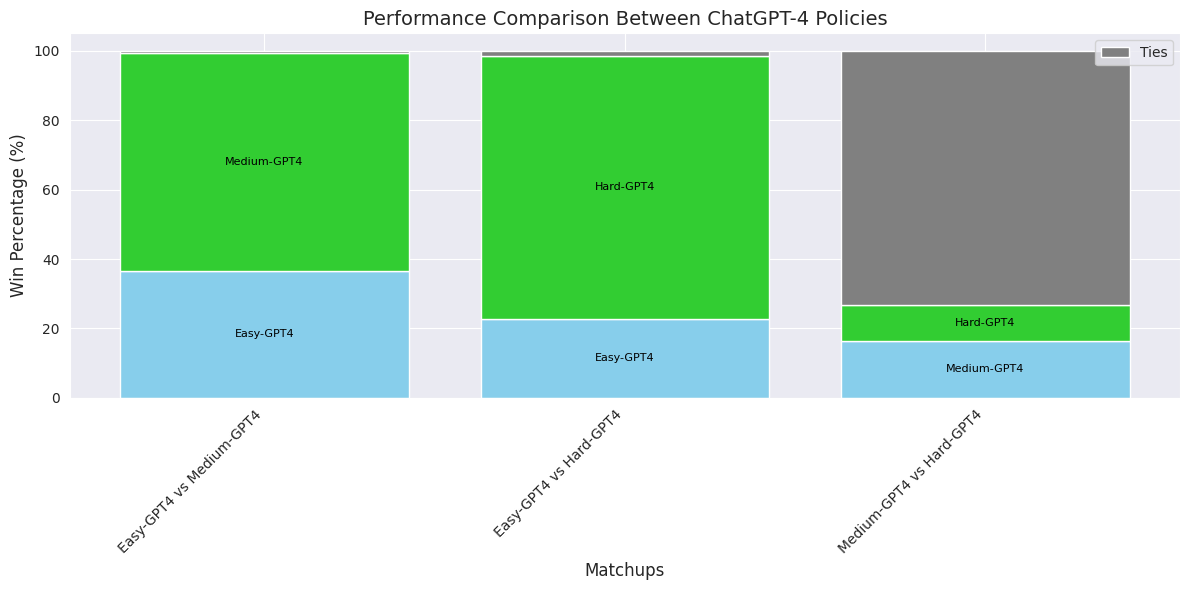

In [16]:
# Filter for games where both policies are from 405B
comparison_games = data[
    (data['Policy1_Name'].str.contains('GPT4')) & (data['Policy2_Name'].str.contains('GPT4'))
    ]

# Calculate win percentages for Policy1, Policy2, and ties
results = []
for _, row in comparison_games.iterrows():
    total_games = row['Policy1_Wins'] + row['Policy2_Wins'] + row['Ties']
    if total_games > 0:
        policy1_win_percentage = (row['Policy1_Wins'] / total_games) * 100
        policy2_win_percentage = (row['Policy2_Wins'] / total_games) * 100
        tie_percentage = (row['Ties'] / total_games) * 100

        results.append({
            'Policy1': row['Policy1_Name'],
            'Policy2': row['Policy2_Name'],
            'Policy1_Win_Percentage': policy1_win_percentage,
            'Policy2_Win_Percentage': policy2_win_percentage,
            'Tie_Percentage': tie_percentage
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Prepare data for the stacked bar chart
x = np.arange(len(results_df))  # the label locations

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
bar1 = plt.bar(x, results_df['Policy1_Win_Percentage'], color='skyblue')
bar2 = plt.bar(x, results_df['Policy2_Win_Percentage'], bottom=results_df['Policy1_Win_Percentage'], color='limegreen')
bar3 = plt.bar(x, results_df['Tie_Percentage'],
               bottom=results_df['Policy1_Win_Percentage'] + results_df['Policy2_Win_Percentage'], label='Ties',
               color='gray')

# Add labels on the bars
for i, rect in enumerate(bar1):
    height = rect.get_height()
    if height > 0:
        plt.text(rect.get_x() + rect.get_width() / 2, height / 2, results_df['Policy1'][i], ha='center', va='center',
                 fontsize=8, color='black')

for i, rect in enumerate(bar2):
    height = rect.get_height()
    if height > 0:
        plt.text(rect.get_x() + rect.get_width() / 2, results_df['Policy1_Win_Percentage'][i] + height / 2,
                 results_df['Policy2'][i], ha='center', va='center', fontsize=8, color='black')

for i, rect in enumerate(bar3):
    height = rect.get_height()
    if height > 0:
        plt.text(rect.get_x() + rect.get_width() / 2,
                 results_df['Policy1_Win_Percentage'][i] + results_df['Policy2_Win_Percentage'][i] + height / 2,
                 '', ha='center', va='center', fontsize=8, color='black')

# Add labels, title, and legend
plt.xlabel('Matchups', fontsize=12)
plt.ylabel('Win Percentage (%)', fontsize=12)
plt.title('Performance Comparison Between ChatGPT-4 Policies', fontsize=14)

# Correctly align xticks with bars
plt.xticks(x, [f"{row['Policy1']} vs {row['Policy2']}" for _, row in results_df.iterrows()], rotation=45, ha='right',
           fontsize=10)

plt.yticks(fontsize=10)
plt.legend(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
results_df[['difficulty1', 'model1']] = results_df['Policy1'].str.split('-', expand=True)
results_df[['difficulty2', 'model2']] = results_df['Policy2'].str.split('-', expand=True)
difficulties = ["Easy", "Medium", "Hard", "Expert"]
colors = ["color3", "yellow", "color1", "color4", "darkgray"]
x_labels = [row["difficulty1"] + " vs.\ " + row["difficulty2"] for _, row in results_df.iterrows()]
print(",".join(x_labels))
for diff_idx, diff in enumerate(difficulties):
    row_str = f"\\addplot[{colors[diff_idx]},line width=0.75pt,fill={colors[diff_idx]}!10] coordinates {{"
    for row_idx, row in results_df.iterrows():
        if row["difficulty1"] == diff:
            val = row["Policy1_Win_Percentage"]
        elif row["difficulty2"] == diff:
            val = row["Policy2_Win_Percentage"]
        else:
            val = 0
        row_str += f"({x_labels[row_idx]},{val}) "
    row_str += "};"
    print(row_str)
row_str = f"\\addplot[gray,line width=0.75pt,fill=gray!10] coordinates {{"
for row_idx, row in results_df.iterrows():
    row_str += f"({x_labels[row_idx]},{row['Tie_Percentage']}) "
row_str += "};"
print(row_str)

Easy vs.\ Medium,Easy vs.\ Hard,Medium vs.\ Hard
\addplot[color3,line width=0.75pt,fill=color3!10] coordinates {(Easy vs.\ Medium,36.6) (Easy vs.\ Hard,22.7) (Medium vs.\ Hard,0) };
\addplot[yellow,line width=0.75pt,fill=yellow!10] coordinates {(Easy vs.\ Medium,62.6) (Easy vs.\ Hard,0) (Medium vs.\ Hard,16.400000000000002) };
\addplot[color1,line width=0.75pt,fill=color1!10] coordinates {(Easy vs.\ Medium,0) (Easy vs.\ Hard,75.9) (Medium vs.\ Hard,10.299999999999999) };
\addplot[color4,line width=0.75pt,fill=color4!10] coordinates {(Easy vs.\ Medium,0) (Easy vs.\ Hard,0) (Medium vs.\ Hard,0) };
\addplot[gray,line width=0.75pt,fill=gray!10] coordinates {(Easy vs.\ Medium,0.8) (Easy vs.\ Hard,1.4000000000000001) (Medium vs.\ Hard,73.3) };


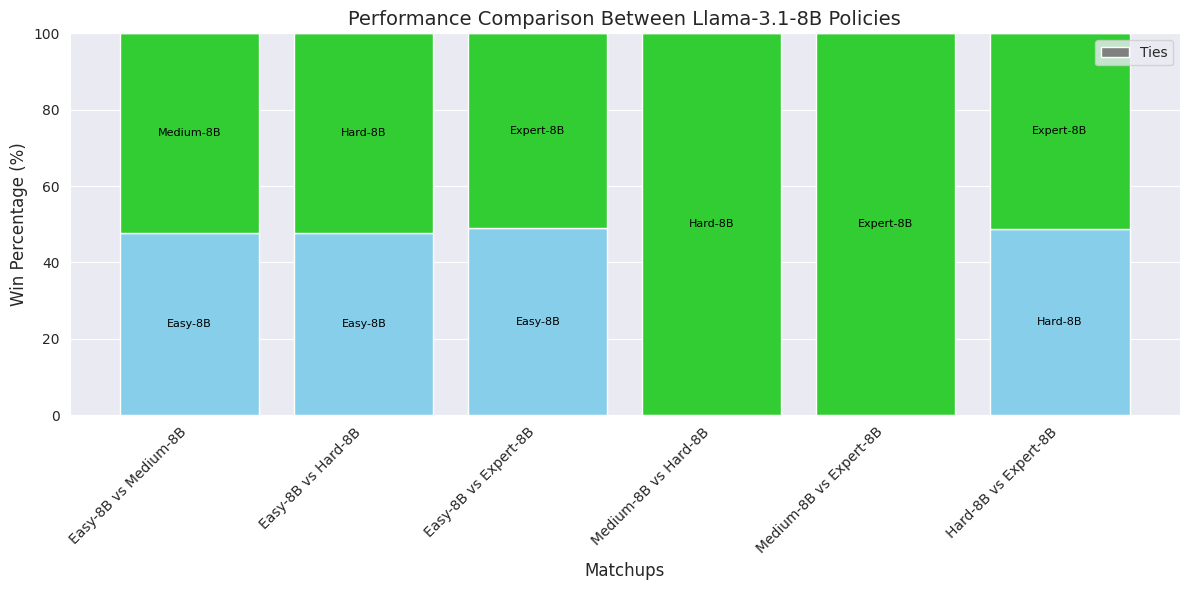

In [34]:
# Filter for games where both policies are from 405B
comparison_games = data[
    (data['Policy1_Name'].str.contains('8B')) & (data['Policy2_Name'].str.contains('8B'))
    ]

# Calculate win percentages for Policy1, Policy2, and ties
results = []
for _, row in comparison_games.iterrows():
    total_games = row['Policy1_Wins'] + row['Policy2_Wins'] + row['Ties']
    if total_games > 0:
        policy1_win_percentage = (row['Policy1_Wins'] / total_games) * 100
        policy2_win_percentage = (row['Policy2_Wins'] / total_games) * 100
        tie_percentage = (row['Ties'] / total_games) * 100

        results.append({
            'Policy1': row['Policy1_Name'],
            'Policy2': row['Policy2_Name'],
            'Policy1_Win_Percentage': policy1_win_percentage,
            'Policy2_Win_Percentage': policy2_win_percentage,
            'Tie_Percentage': tie_percentage
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Prepare data for the stacked bar chart
x = np.arange(len(results_df))  # the label locations

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
bar1 = plt.bar(x, results_df['Policy1_Win_Percentage'], color='skyblue')
bar2 = plt.bar(x, results_df['Policy2_Win_Percentage'], bottom=results_df['Policy1_Win_Percentage'], color='limegreen')
bar3 = plt.bar(x, results_df['Tie_Percentage'],
               bottom=results_df['Policy1_Win_Percentage'] + results_df['Policy2_Win_Percentage'], label='Ties',
               color='gray')

# Add labels on the bars
for i, rect in enumerate(bar1):
    height = rect.get_height()
    if height > 0:
        plt.text(rect.get_x() + rect.get_width() / 2, height / 2, results_df['Policy1'][i], ha='center', va='center',
                 fontsize=8, color='black')

for i, rect in enumerate(bar2):
    height = rect.get_height()
    if height > 0:
        plt.text(rect.get_x() + rect.get_width() / 2, results_df['Policy1_Win_Percentage'][i] + height / 2,
                 results_df['Policy2'][i], ha='center', va='center', fontsize=8, color='black')

for i, rect in enumerate(bar3):
    height = rect.get_height()
    if height > 0:
        plt.text(rect.get_x() + rect.get_width() / 2,
                 results_df['Policy1_Win_Percentage'][i] + results_df['Policy2_Win_Percentage'][i] + height / 2,
                 '', ha='center', va='center', fontsize=8, color='black')

# Add labels, title, and legend
plt.xlabel('Matchups', fontsize=12)
plt.ylabel('Win Percentage (%)', fontsize=12)
plt.title('Performance Comparison Between Llama-3.1-8B Policies', fontsize=14)

# Correctly align xticks with bars
plt.xticks(x, [f"{row['Policy1']} vs {row['Policy2']}" for _, row in results_df.iterrows()], rotation=45, ha='right',
           fontsize=10)

plt.yticks(fontsize=10)
plt.legend(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [39]:
results_df[['difficulty1', 'model1']] = results_df['Policy1'].str.split('-', expand=True)
results_df[['difficulty2', 'model2']] = results_df['Policy2'].str.split('-', expand=True)
results_df = results_df[results_df['difficulty1'] != "Expert"]
results_df = results_df[results_df['difficulty2'] != "Expert"]
results_df.reset_index(drop=True, inplace=True)
difficulties = ["Easy", "Medium", "Hard", "Expert"]
colors = ["color3", "yellow", "color1", "color4", "darkgray"]
x_labels = [row["difficulty1"] + " vs.\ " + row["difficulty2"] for _, row in results_df.iterrows()]
print("symbolic x coords={" + ",".join(x_labels) + "},")
for diff_idx, diff in enumerate(difficulties):
    row_str = f"\\addplot[{colors[diff_idx]},line width=0.75pt,fill={colors[diff_idx]}!10] coordinates {{"
    for row_idx, row in results_df.iterrows():
        if row["difficulty1"] == diff:
            val = row["Policy1_Win_Percentage"]
        elif row["difficulty2"] == diff:
            val = row["Policy2_Win_Percentage"]
        else:
            val = 0
        row_str += f"({x_labels[row_idx]},{val}) "
    row_str += "};"
    print(row_str)
row_str = f"\\addplot[gray,line width=0.75pt,fill=gray!10] coordinates {{"
for row_idx, row in results_df.iterrows():
    row_str += f"({x_labels[row_idx]},{row['Tie_Percentage']}) "
row_str += "};"
print(row_str)

symbolic x coords={Easy vs.\ Medium,Easy vs.\ Hard,Medium vs.\ Hard},
\addplot[color3,line width=0.75pt,fill=color3!10] coordinates {(Easy vs.\ Medium,47.699999999999996) (Easy vs.\ Hard,47.8) (Medium vs.\ Hard,0) };
\addplot[yellow,line width=0.75pt,fill=yellow!10] coordinates {(Easy vs.\ Medium,52.300000000000004) (Easy vs.\ Hard,0) (Medium vs.\ Hard,0.0) };
\addplot[color1,line width=0.75pt,fill=color1!10] coordinates {(Easy vs.\ Medium,0) (Easy vs.\ Hard,52.2) (Medium vs.\ Hard,100.0) };
\addplot[color4,line width=0.75pt,fill=color4!10] coordinates {(Easy vs.\ Medium,0) (Easy vs.\ Hard,0) (Medium vs.\ Hard,0) };
\addplot[gray,line width=0.75pt,fill=gray!10] coordinates {(Easy vs.\ Medium,0.0) (Easy vs.\ Hard,0.0) (Medium vs.\ Hard,0.0) };


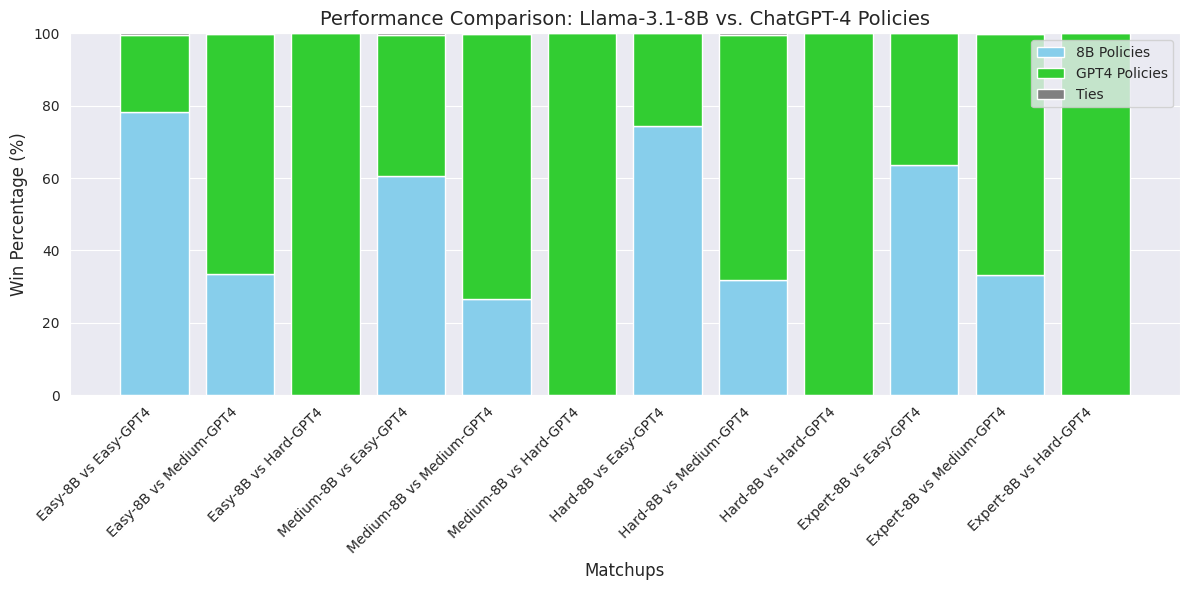

In [40]:

# Filter for games between 8B and 405B policies
comparison_games = data[
    ((data['Policy1_Name'].str.contains('GPT4')) & (data['Policy2_Name'].str.contains('8B'))) |
    ((data['Policy1_Name'].str.contains('8B')) & (data['Policy2_Name'].str.contains('GPT4')))
    ]

# Calculate win percentages for 8B and 405B policies
results = []
for _, row in comparison_games.iterrows():
    total_games = row['Policy1_Wins'] + row['Policy2_Wins'] + row['Ties']
    if total_games > 0:
        if 'GPT4' in row['Policy1_Name']:
            win_percentage_gpt4 = (row['Policy1_Wins'] / total_games) * 100
            win_percentage_405b = (row['Policy2_Wins'] / total_games) * 100
        else:
            win_percentage_gpt4 = (row['Policy2_Wins'] / total_games) * 100
            win_percentage_405b = (row['Policy1_Wins'] / total_games) * 100

        results.append({
            'GPT4_Policy': row['Policy1_Name'] if 'GPT4' in row['Policy1_Name'] else row['Policy2_Name'],
            '8B_Policy': row['Policy2_Name'] if '8B' in row['Policy2_Name'] else row['Policy1_Name'],
            'GPT4_Win_Percentage': win_percentage_gpt4,
            '8B_Win_Percentage': win_percentage_405b,
            'Ties_Percentage': 100 - (win_percentage_gpt4 + win_percentage_405b)
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Prepare data for the stacked bar chart
x = np.arange(len(results_df))  # the label locations

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(x, results_df['8B_Win_Percentage'], label='8B Policies', color='skyblue')
plt.bar(x, results_df['GPT4_Win_Percentage'], bottom=results_df['8B_Win_Percentage'], label='GPT4 Policies',
        color='limegreen')
plt.bar(x, results_df['Ties_Percentage'], bottom=results_df['8B_Win_Percentage'] + results_df['GPT4_Win_Percentage'],
        label='Ties', color='gray')

# Add labels, title, and legend
plt.xlabel('Matchups', fontsize=12)
plt.ylabel('Win Percentage (%)', fontsize=12)
plt.title('Performance Comparison: Llama-3.1-8B vs. ChatGPT-4 Policies', fontsize=14)

# Correctly align xticks with bars
plt.xticks(x, [f"{row['8B_Policy']} vs {row['GPT4_Policy']}" for _, row in results_df.iterrows()], rotation=45,
           ha='right', fontsize=10)

plt.yticks(fontsize=10)
plt.legend(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()



In [42]:
# lama 8 gpt 4
difficulties = ["Easy", "Medium", "Hard"]
print("x\ty\tvalue")
for gpt in range(3):
    for lama in range(3):
        tmp = results_df[(results_df['GPT4_Policy'] == f"{difficulties[gpt]}-GPT4") & (
                    results_df['8B_Policy'] == f"{difficulties[lama]}-8B")]
        pos = tmp["GPT4_Win_Percentage"].tolist()[0] / 100
        neg = tmp["8B_Win_Percentage"].tolist()[0] / 100
        value = pos - neg
        print(f"{gpt}\t{lama}\t{value}")

x	y	value
0	0	-0.571
0	1	-0.21599999999999997
0	2	-0.4880000000000001
1	0	0.3269999999999999
1	1	0.46499999999999997
1	2	0.35700000000000004
2	0	1.0
2	1	1.0
2	2	1.0
